# Analysis of the autism data

In [7]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


In [25]:
df = pd.read_csv(AUTISM_DATA_PATH)
    
data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = CVA_COLUMNS, 
                scale_data=True,
                use_missing_indicator_variables=False,
               verbosity=4,
               scenario='papers',
               proportion_train=1)


with open(os.path.join(DATA_DIR, 'selected_features_{}.pkl'.format(scenario)), 'rb') as f:
    features = pickle.load(f)

Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Removing 2326/2823 keeping only subject in studies: ['ARC', 'P1'].
Removing 12/497 keeping first admin.
Removing 26/485 keeping only subject with diagnosis: [0, 1].
459 administrations left.


,id
diagnosis,
0.0,416
1.0,43


Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.
Predicting diagnosis based on 58 features
Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.


# Analysis of Missing data patterns in the sample

Predicting diagnosis based on 58 features
Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.
Predicting diagnosis based on 56 features
Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.


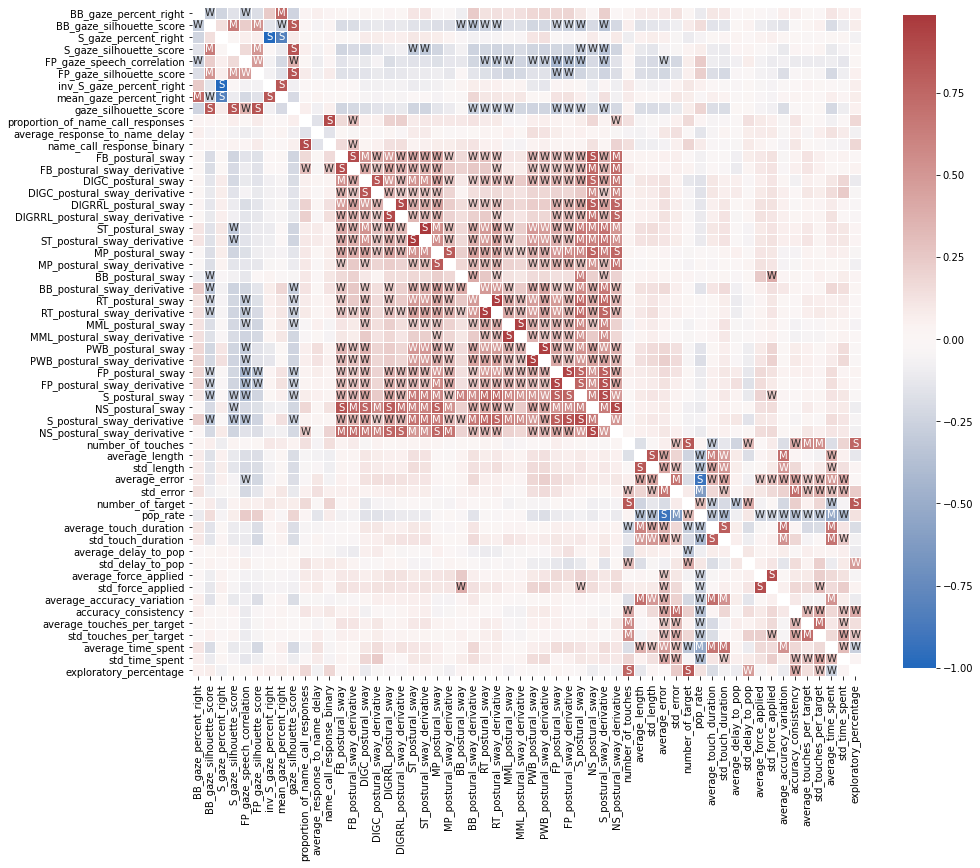

In [23]:
import missingno as msno
data.features_name = CVA_COLUMNS 

data.features_name = [f for f in data.features_name if f not in ['PB_postural_sway', 'PB_postural_sway_derivative', 'diagnosis']]

df_X = data.df[data.features_name]
# Computes feature correlation
df_corr = df_X.corr(method="pearson")
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

#plt.figure(figsize=(15, 15))
#df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),
#                                    title="Percentage of missing values per feature")

Text(0, 0.5, 'Number of administration with this pattern missing.')

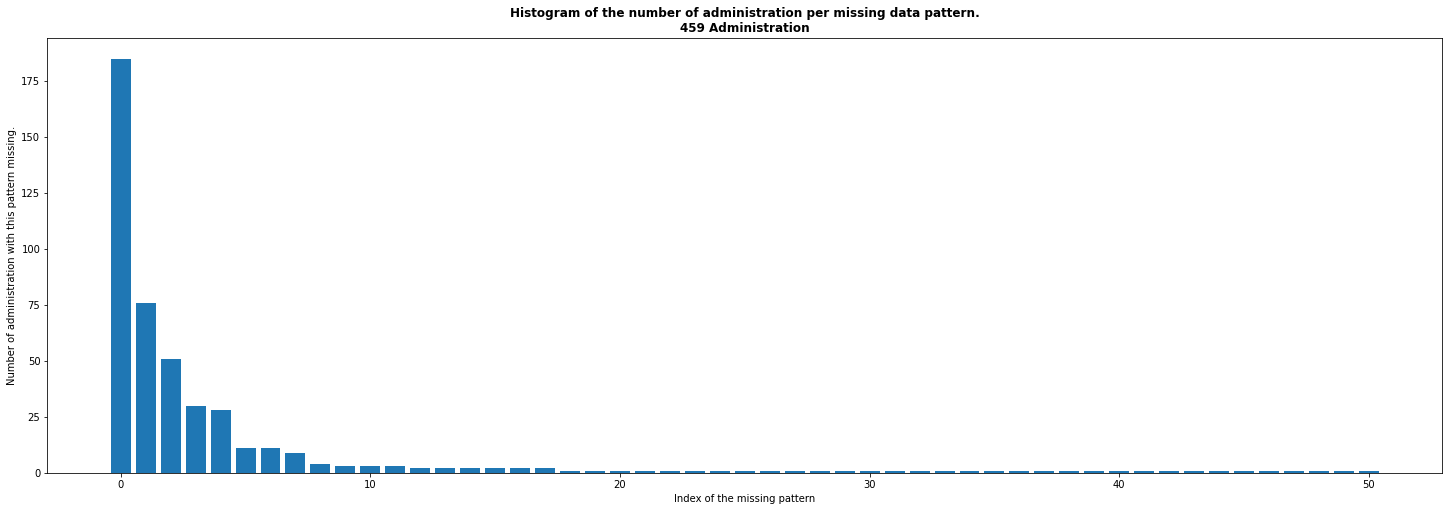

In [24]:
variables_of_interest = data.features_name


X  = data.df[variables_of_interest]
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]
# mean and covariance estimates
# ideally, this is done with a maximum likelihood estimator
gmean = dataset.mean()
gcov = dataset.cov()

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
data.df["mdp"] = pd.Series(correct_mdp, index=dataset.index)

plt.figure(figsize=(25, 8))
plt.bar(x=np.arange((len(data.df["mdp"].value_counts().index))), height=data.df["mdp"].value_counts().to_numpy())
plt.title("Histogram of the number of administration per missing data pattern.\n{} Administration".format(len(data.df)), weight='bold');plt.xlabel("Index of the missing pattern"); plt.ylabel("Number of administration with this pattern missing.")

Text(0, 0.5, 'Number of administration with this pattern missing.')

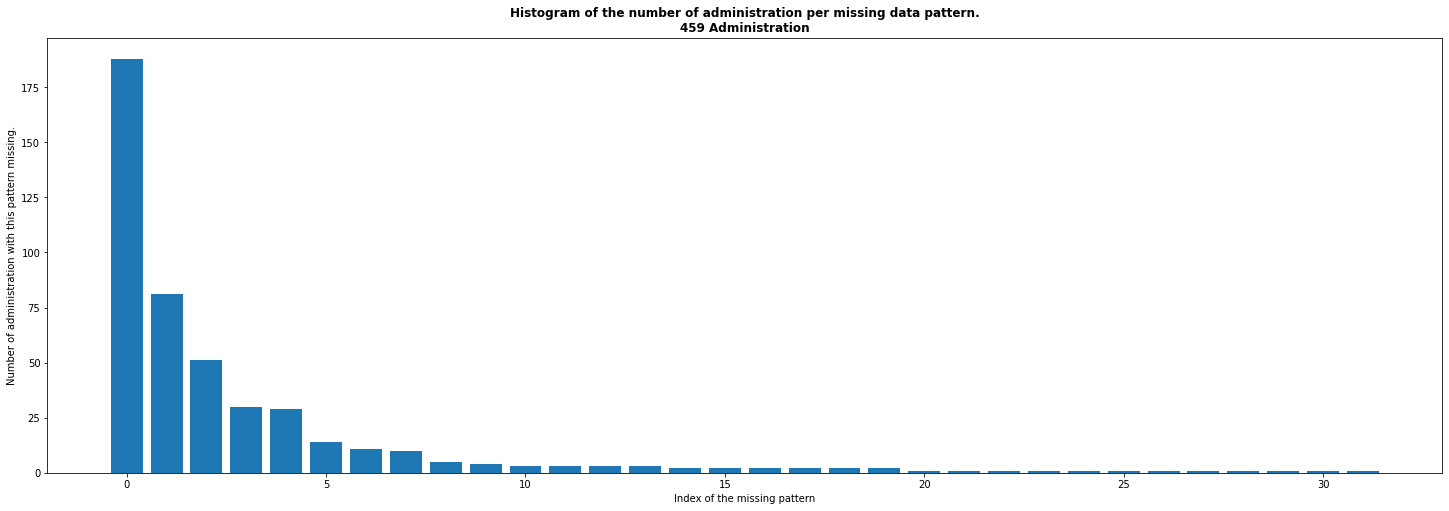

In [ ]:
variables_of_interest = data.features_name


X  = data.df[variables_of_interest]
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]
# mean and covariance estimates
# ideally, this is done with a maximum likelihood estimator
gmean = dataset.mean()
gcov = dataset.cov()

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
data.df["mdp"] = pd.Series(correct_mdp, index=dataset.index)

plt.figure(figsize=(25, 8))
plt.bar(x=np.arange((len(data.df["mdp"].value_counts().index))), height=data.df["mdp"].value_counts().to_numpy())
plt.title("Histogram of the number of administration per missing data pattern.\n{} Administration".format(len(data.df)), weight='bold');plt.xlabel("Index of the missing pattern"); plt.ylabel("Number of administration with this pattern missing.")

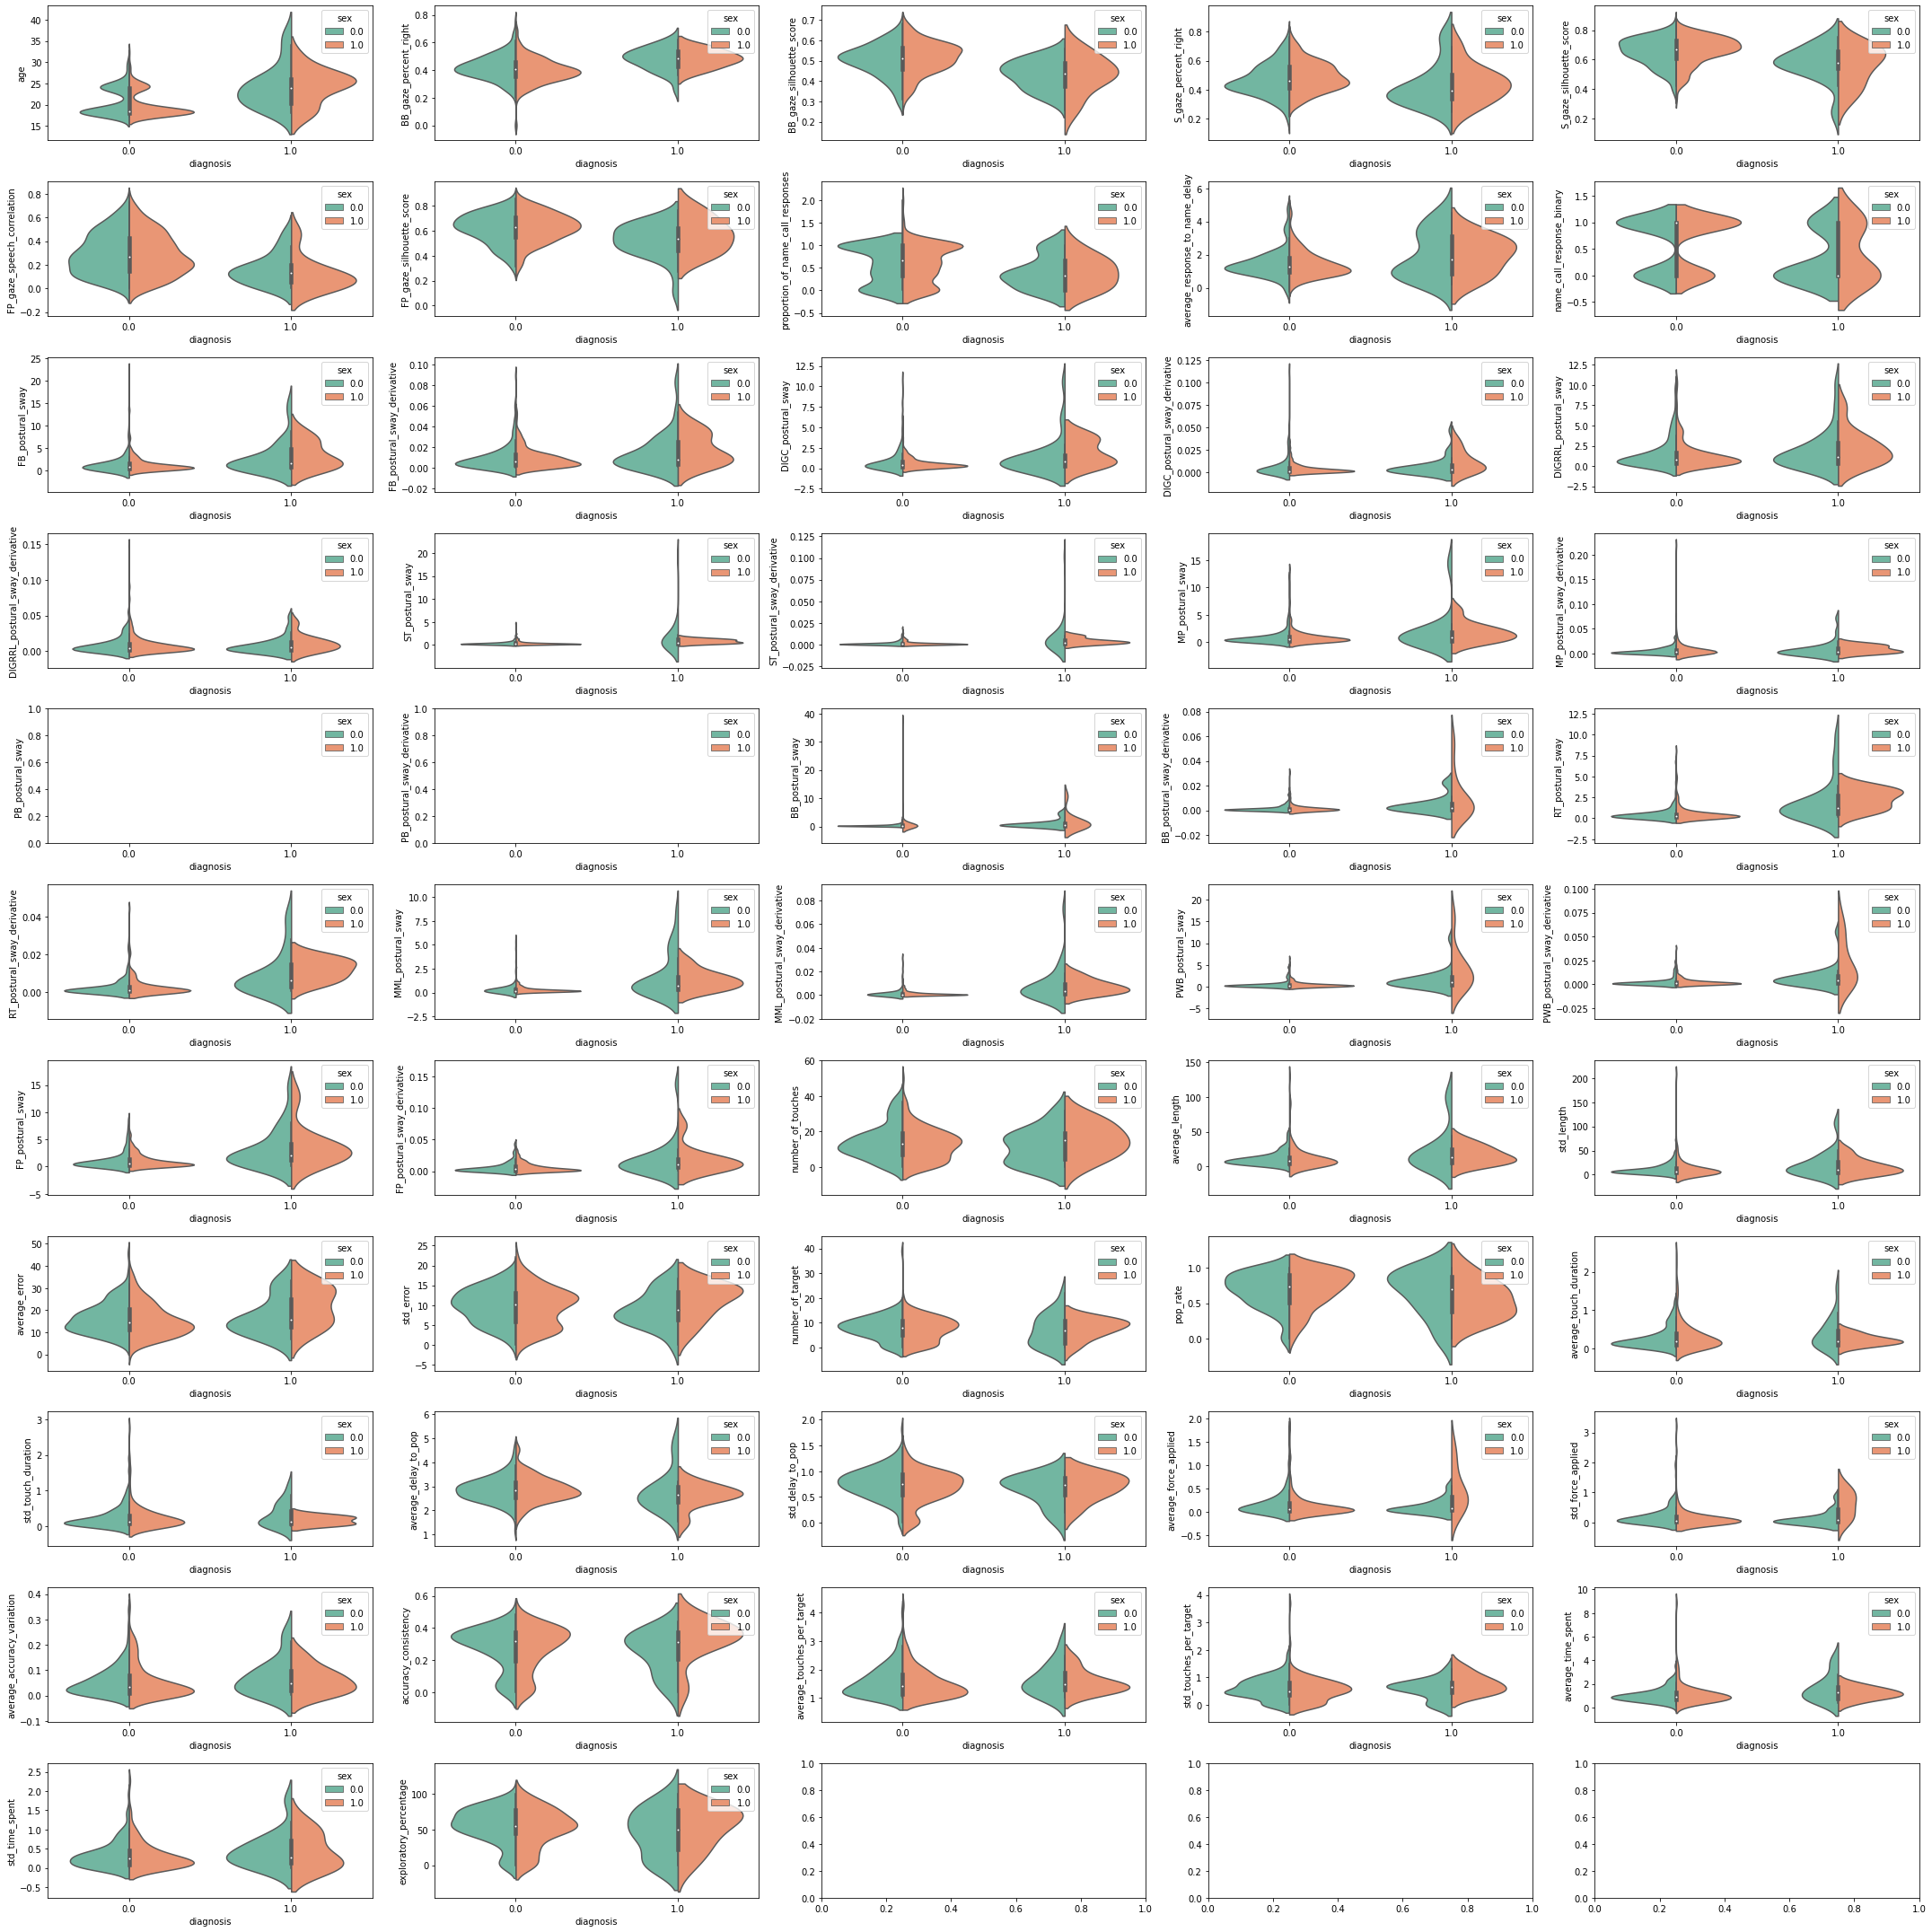

In [ ]:
selected_features = ['age'] + CVA_COLUMNS

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(30, 30))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=data.df, y=col, x='diagnosis', hue='sex', palette="Set2",
                   split=True, ax=ax)
plt.tight_layout()

In [ ]:
variables_of_interest = CVA_COLUMNS


X  = data.df[variables_of_interest]
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]
# mean and covariance estimates
# ideally, this is done with a maximum likelihood estimator
gmean = dataset.mean()
gcov = dataset.cov()

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
data.df["mdp"] = pd.Series(correct_mdp, index=dataset.index)

In [8]:
print("Number of missing patterns: {} (over {} theoretically possible; 2^K)".format(n_pat, 2**len(variables_of_interest)))

Number of missing patterns: 51 (over 2251799813685248 theoretically possible; 2^K)


Text(0.5, 1.0, 'Features missing for the most frequent patterns. 459 adm (416 NT, 43 ASD)')

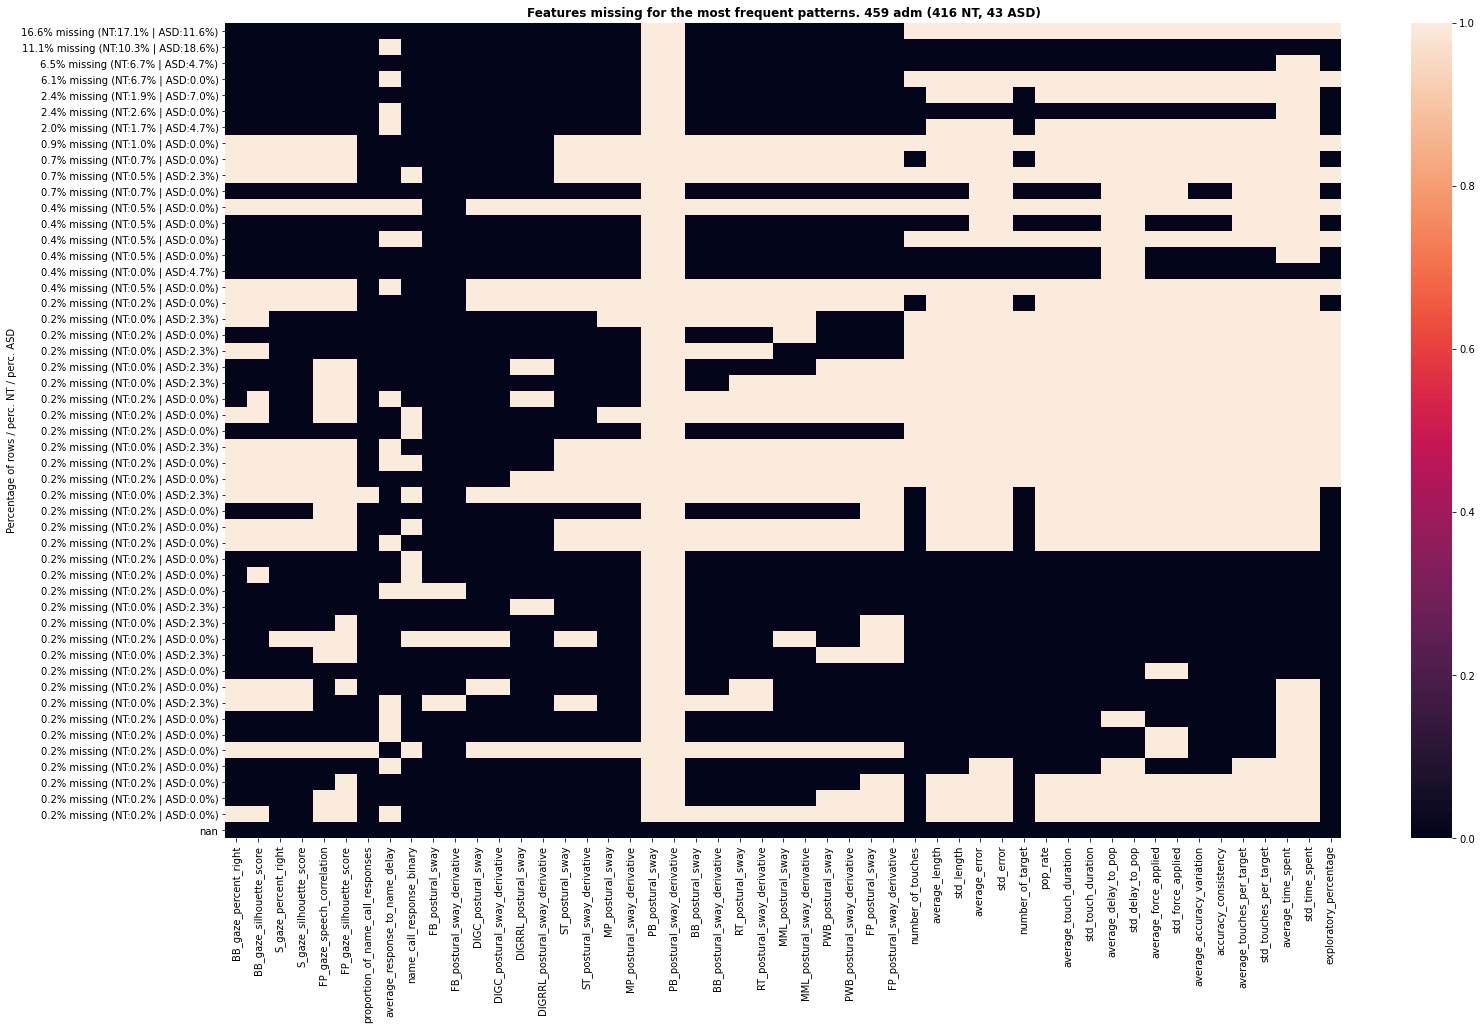

In [ ]:

matrix = pd.DataFrame(
            data=np.zeros(shape=(len(data.df["mdp"].value_counts().index), len(variables_of_interest)+1)),
            columns=variables_of_interest+['Percentage of rows'],
            index=data.df["mdp"].unique(),
        ).sort_index()

for pattern in sorted(data.df["mdp"].unique())[1:]:
    d = data.df.loc[data.df['mdp']==pattern, ['diagnosis'] + variables_of_interest]
    missing_columns = list(d.columns[d.isnull().any()])
    matrix.loc[pattern, missing_columns] = 1
    matrix.loc[pattern, 'Percentage of rows'] = np.round(len(d)/len(data.df)*100,2)
    #matrix.loc[pattern, 'Percentage of rows (autism)'] = np.round(len(d[d['diagnosis']==0])/len(data.df[data.df['diagnosis']==0])*100,2)
    #matrix.loc[pattern, 'Percentage of rows (NT)'] = np.round(len(d[d['diagnosis']==1])/len(data.df[data.df['diagnosis']==1])*100,2)
    matrix.loc[pattern, 'Percentage of rows / perc. NT / perc. ASD'] = "{}% missing (NT:{}% | ASD:{}%)".format(np.round(len(d)/len(data.df)*100,1), np.round(len(d[d['diagnosis']==0])/len(data.df[data.df['diagnosis']==0])*100,1), np.round(len(d[d['diagnosis']==1])/len(data.df[data.df['diagnosis']==1])*100,1))
matrix.sort_values('Percentage of rows', ascending=False, inplace=True)
plt.figure(figsize=(25, 15))
sns.heatmap(matrix.set_index('Percentage of rows / perc. NT / perc. ASD').loc[:, variables_of_interest].astype(int))
plt.title("Features missing for the most frequent patterns. {} adm ({} NT, {} ASD)".format(len(data.df), len(data.df[data.df['diagnosis']==0]), len(data.df[data.df['diagnosis']==1])), weight='bold')

In [ ]:
grouped_features

grouped_features_label = {0:'Floating Bubbles',
                         1: 'DIGC',
                         2: 'DIGRRL',
                         3: 'ST',
                         4: 'Social PS',
                         5: 'PlayingWithBlocks',
                         6: 'FP',
                         7: 'MP',
                         8: 'BB',
                         9: 'RT',
                         10: 'MML',
                        11: 'Game', 
                        12: 'Game no touches', 
                        13: 'Game no force',
                        14: 'No touches per target',
                        15: 'delay to pop',
                        16: 'Game no grouped touches',
                        17: 'Peakaboo'}

dict_check_1_0 = {12:[11],
                 13:[11, 12],
                 13:[11, 12],
                 14:[11, 12],
                 15:[11, 12],
                 16:[11, 12],
                 }

<AxesSubplot:ylabel='Percentage of rows / perc. NT / perc. ASD'>

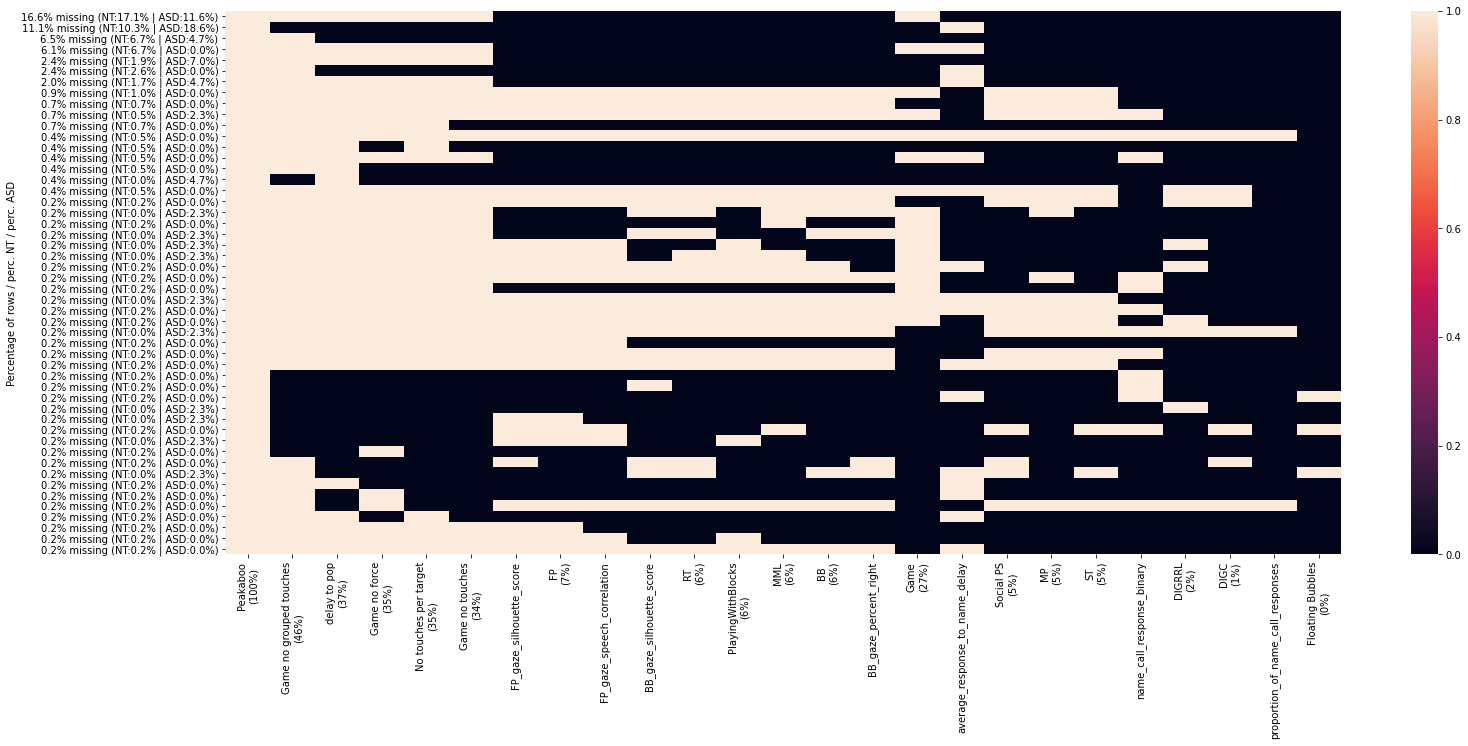

In [ ]:
matrix = matrix.loc[matrix['Percentage of rows'] >.1, :].transpose()

new_df = matrix.loc[['Percentage of rows / perc. NT / perc. ASD'], :].copy()
duplicated_rows = matrix[matrix.duplicated(keep=False)]

def df_missing_features(df, features, having_features_missing=True):
    if having_features_missing:
        return df.loc[df.drop(index=df.dropna(subset=features, how='all').index).index, :]
    else:
        return df.dropna(subset=features, how='all')
    
    
grouped_features = {}
for idx, (i, f) in enumerate(duplicated_rows.groupby(list(duplicated_rows))):
    grouped_features[idx]=[]
    for col in f.index:
        grouped_features[idx].append(col)    
    
for i, feats in grouped_features.items():
    grouped_features_label[i] += "\n({}%)".format(int(len(df_missing_features(data.df, features=feats, having_features_missing=True))/len(data.df)*100))
    
    
for idx, (i, f) in enumerate(duplicated_rows.groupby(list(duplicated_rows))):
    index = ""
    for col in f.index:
        index+=col+"\n"
    index = index[:-1]
    new_df = new_df.append(pd.DataFrame(data=f.iloc[:1].to_numpy().astype(int), index=[grouped_features_label[idx]], columns=f.columns))
    

    
    
new_df = new_df.append(matrix[~matrix.duplicated(keep=False)].drop(index=['Percentage of rows','Percentage of rows / perc. NT / perc. ASD'])).transpose()
new_df.set_index('Percentage of rows / perc. NT / perc. ASD', inplace=True)
new_df = new_df.loc[:,list(new_df.sum(axis=0).sort_values(ascending=False).index)]

plt.figure(figsize=(25, 10))
sns.heatmap(new_df.astype(int))

## Adding the indicator variables to the dataframe

In [13]:

for i, feats in grouped_features.items():
    data.df['Z_grouped_{}'.format(i)] = 0
    data.df.loc[data.df.drop(index=data.df.dropna(subset=feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1


# Statistical tests on the missing data


In [14]:
from scipy.stats import chi2, ttest_ind

In [15]:
data.df['stimuli_version'] = data.df['path'].apply(lambda path: path.split('/')[-2])
data.df.loc[~data.df['stimuli_version'].isin(['Older_Than_18', '12_Months', '9_Months', '6_Months']), 'stimuli_version'] = 'Older_Than_18'
data.df['stimuli_version'].value_counts()

Older_Than_18    459
Name: stimuli_version, dtype: int64

In [16]:
grouped_features

{0: ['FB_postural_sway', 'FB_postural_sway_derivative'],
 1: ['DIGC_postural_sway', 'DIGC_postural_sway_derivative'],
 2: ['DIGRRL_postural_sway', 'DIGRRL_postural_sway_derivative'],
 3: ['ST_postural_sway', 'ST_postural_sway_derivative'],
 4: ['S_gaze_percent_right', 'S_gaze_silhouette_score'],
 5: ['PWB_postural_sway', 'PWB_postural_sway_derivative'],
 6: ['FP_postural_sway', 'FP_postural_sway_derivative'],
 7: ['MP_postural_sway', 'MP_postural_sway_derivative'],
 8: ['BB_postural_sway', 'BB_postural_sway_derivative'],
 9: ['RT_postural_sway', 'RT_postural_sway_derivative'],
 10: ['MML_postural_sway', 'MML_postural_sway_derivative'],
 11: ['number_of_touches', 'number_of_target', 'exploratory_percentage'],
 12: ['average_length',
  'std_length',
  'pop_rate',
  'average_touch_duration',
  'std_touch_duration',
  'average_accuracy_variation',
  'accuracy_consistency'],
 13: ['average_force_applied', 'std_force_applied'],
 14: ['average_error',
  'std_error',
  'average_touches_per_tar

## Continuous Variables

In [ ]:
variables_of_interest = list(grouped_features.values())
#data.filter(administration={'complete':True, 'order': 'first'})

vars = ['age', 'mullen_el',  'mullen_fm','mullen_rl','mullen_vr','mullen_elc_std','ados_total',  'ados_rrb',
         'ados_sa','srs_total_tscore', 'srs_social_awareness_tscore',
         'srs_social_motivation_tscore',
         'cbcl_scaleIV_score',
         'cbcl_asd_score',
         'mchat_total']


mcar_matrix = pd.DataFrame(
    data=np.zeros(shape=(len(vars), len(variables_of_interest))),
    columns=list(grouped_features.keys()),
    index=vars,
)


In [ ]:
for i, feats in grouped_features.items():
    for j, var in enumerate(vars):
        
        d = data.df.copy()

        
        if i in dict_check_1_0.keys():
            for idx_group_that_should_be_there in dict_check_1_0[i]:
                d = d[d['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
                
        
        having = df_missing_features(d, feats, having_features_missing=False)[var].dropna()
        missing = df_missing_features(d, feats, having_features_missing=True)[var].dropna()
        
        if len(having) < 20 or len(missing) < 20:
            mcar_matrix.loc[var, i] = np.nan
            continue
            
        mcar_matrix.loc[var, i] = ttest_ind(having, missing, equal_var=False).pvalue


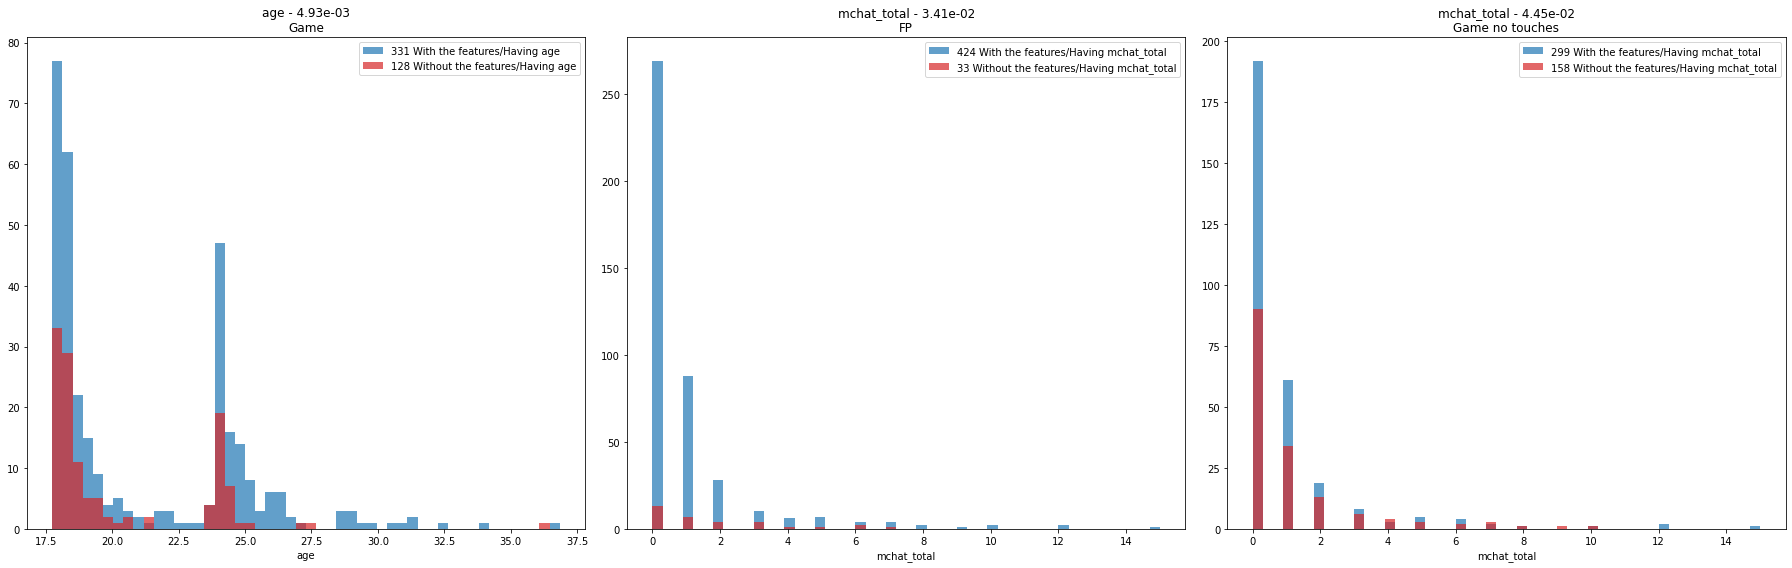

In [ ]:
mask  = (mcar_matrix<0.05).astype(int)

locations = [(index, column) for index in mask.index for column in mask.columns if mask.loc[index, column]==1]

fig, axes = plt.subplots(len(locations)//3, 3, figsize=(25, 8));axes = axes.flatten()
for j, (var, idx) in enumerate(locations):
    feats = grouped_features[idx]
    
    d = data.df.copy()

    having = df_missing_features(d, feats, having_features_missing=False)[var].dropna()
    missing = df_missing_features(d, feats, having_features_missing=True)[var].dropna()
    
    _, bins, _ = axes[j].hist(having, density=False, bins = 50, color='tab:blue', label='{} With the features/Having {}'.format(len(having), var), alpha=.7)
    axes[j].hist(missing, bins = bins, density=False, color='tab:red', label='{} Without the features/Having {}'.format(len(missing), var), alpha=.7)
    axes[j].set_title("{} - {:.2e}\n{}".format(var, mcar_matrix.loc[var, idx], grouped_features_label[idx]));axes[j].set_xlabel(var)
    axes[j].legend()
plt.tight_layout()

### Categorical Variables

In [ ]:
variables_of_interest = list(grouped_features.values())
vars = ['StateOfTheChild','SiblingsInTheRoom','ShotsVaccines','Distractions','FamilyMemberDistract','PetDistract',
        'PetNoiseDistract','DoorbellPhoneDistract','TVOnDistract','OtherDistract','SittingUp','Hungry','Diaper','AppTeamComment',
        'Comments','sex','diagnosis','ados_total','ados_rrb','ados_sa','mchat_result']

from scipy.stats import chi2_contingency
mcar_matrix = pd.DataFrame(data=np.zeros(shape=(len(vars), len(variables_of_interest))),
                            columns=list(grouped_features.keys()),
                            index=vars)

In [ ]:
for i, feats in grouped_features.items():

    for j, var in enumerate(vars):
        
        d = data.df.copy()
            
        if i in dict_check_1_0.keys():
            for idx_group_that_should_be_there in dict_check_1_0[i]:
                d = d[d['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
                
        
        having = df_missing_features(d, feats, having_features_missing=False)[var].dropna()
        missing = df_missing_features(d, feats, having_features_missing=True)[var].dropna()
        
        
        
        table = pd.crosstab(d['Z_grouped_{}'.format(i)], d[var]).to_numpy()
        
        stat, p, dof, expected = chi2_contingency(np.array(table))
        
        values_with = d[d['Z_grouped_{}'.format(i)]==0][var].dropna()
        values_without = d[d['Z_grouped_{}'.format(i)]==1][var].dropna()
        
        if len(values_with) < 20 or len(values_without) < 20:
            mcar_matrix.loc[var, i] = np.nan
            continue

    
        mcar_matrix.loc[var, i] = p
    

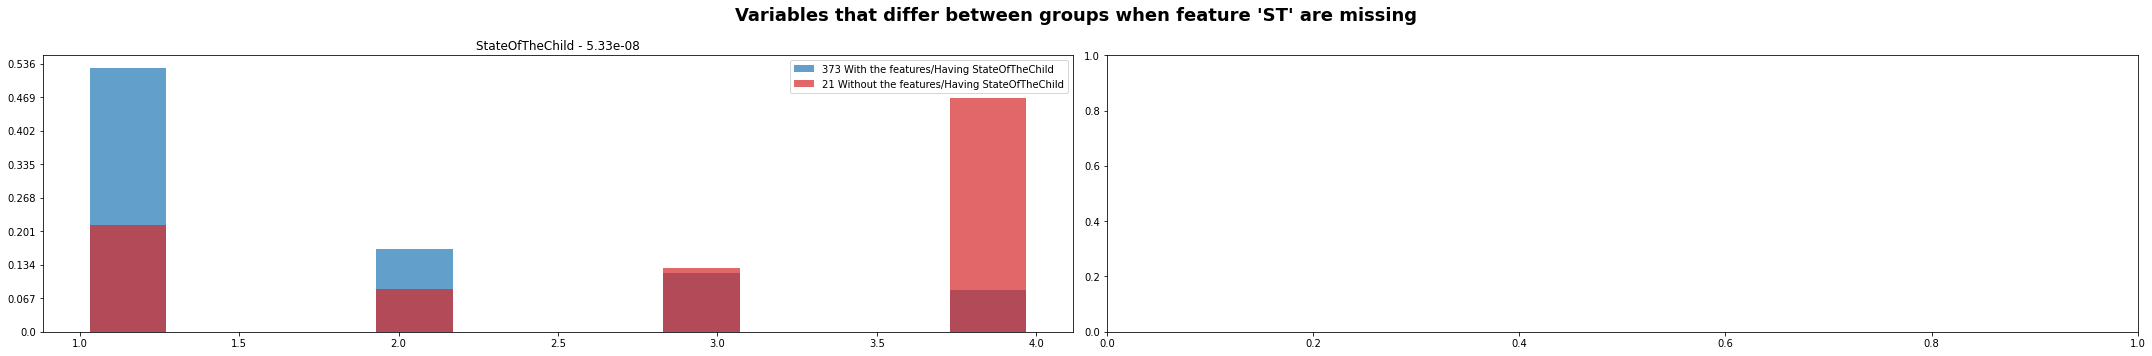

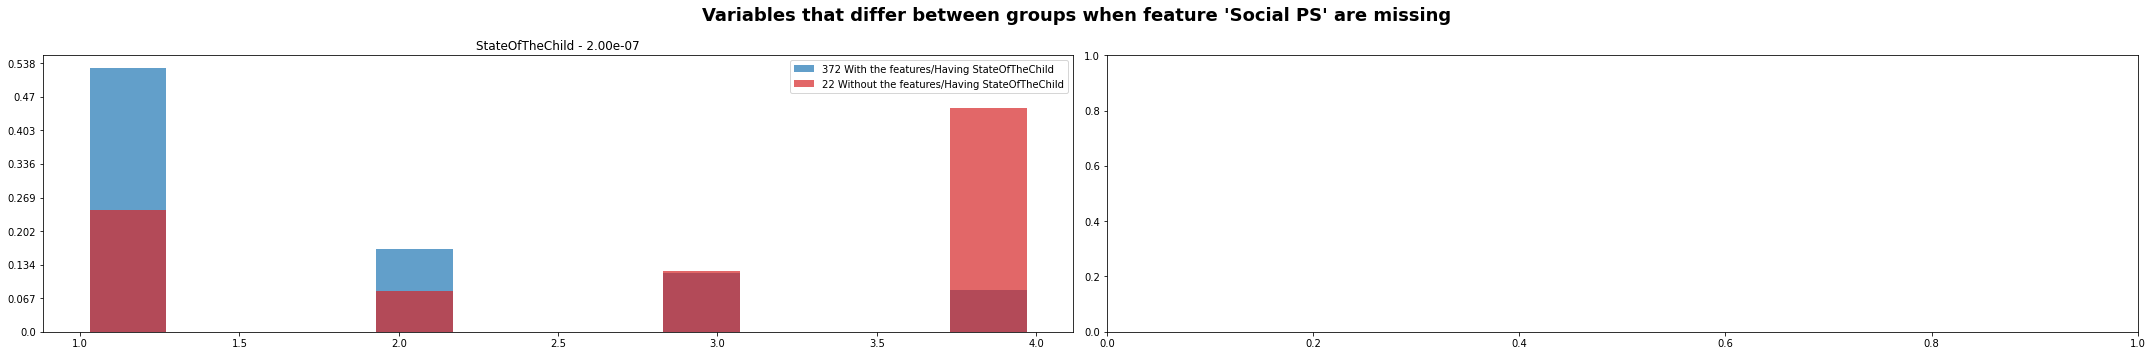

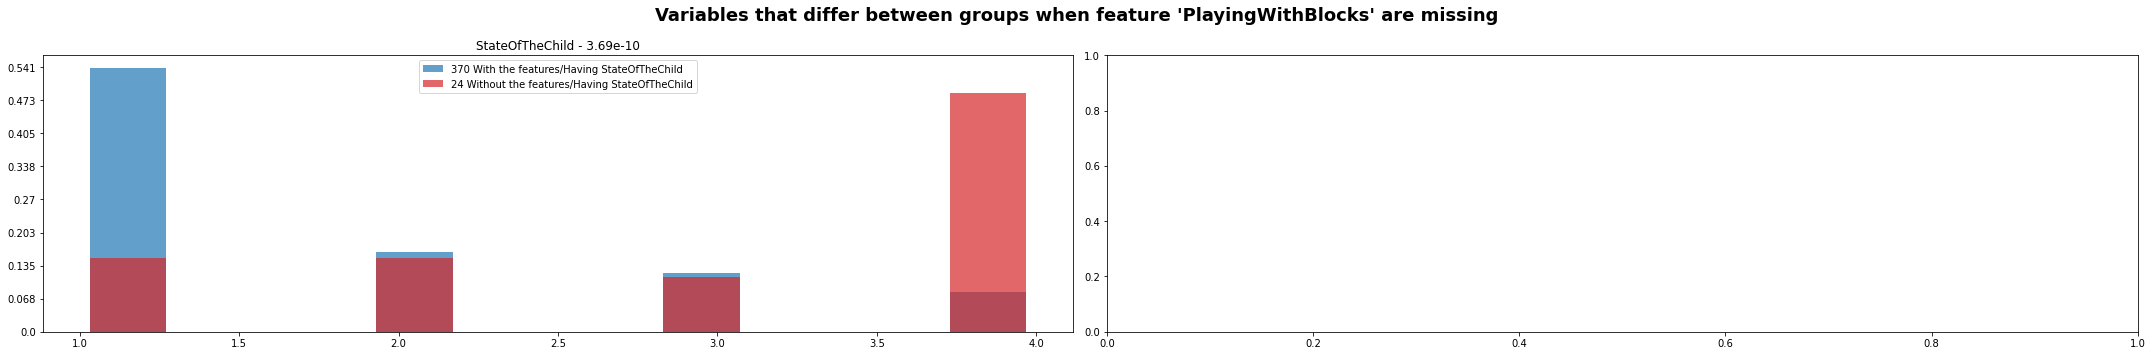

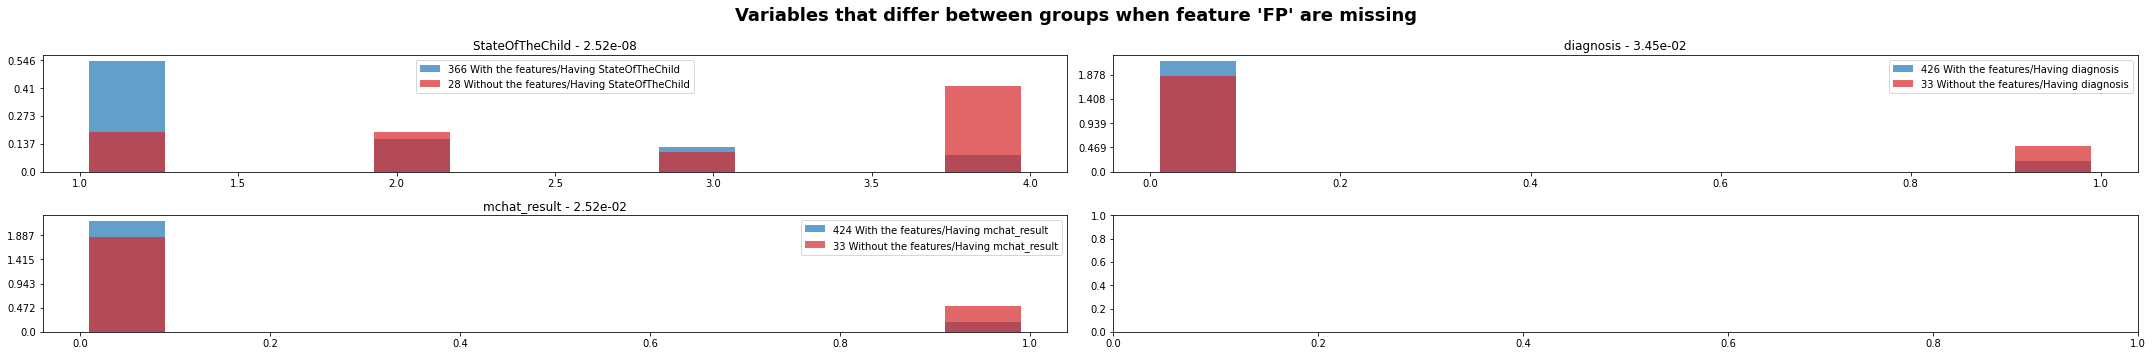

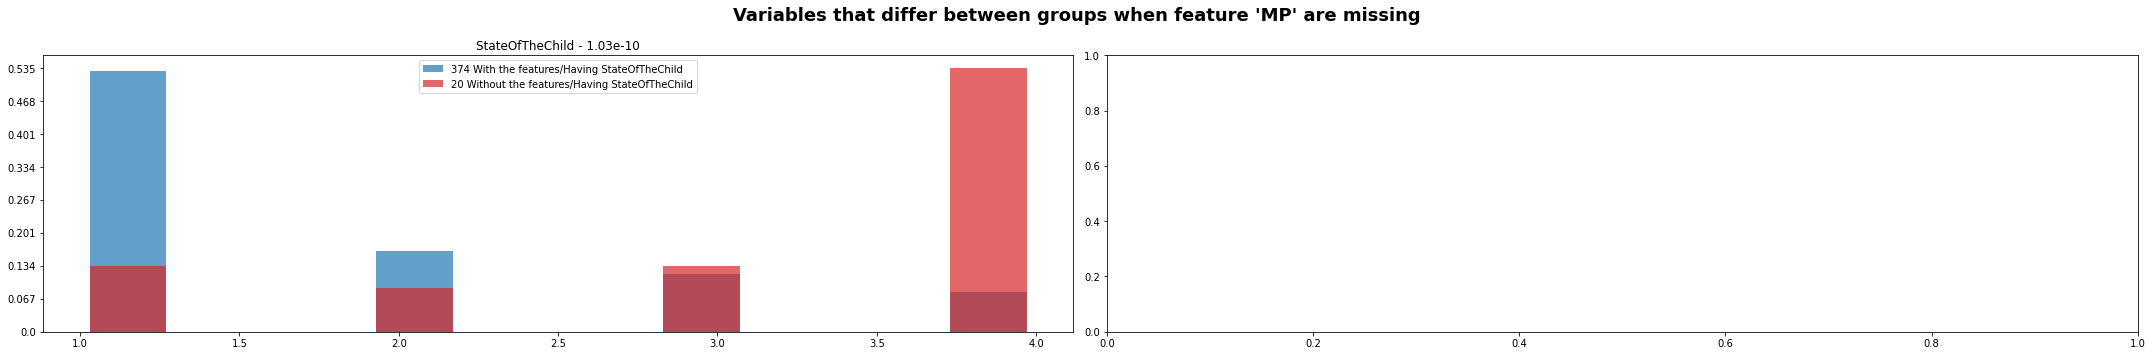

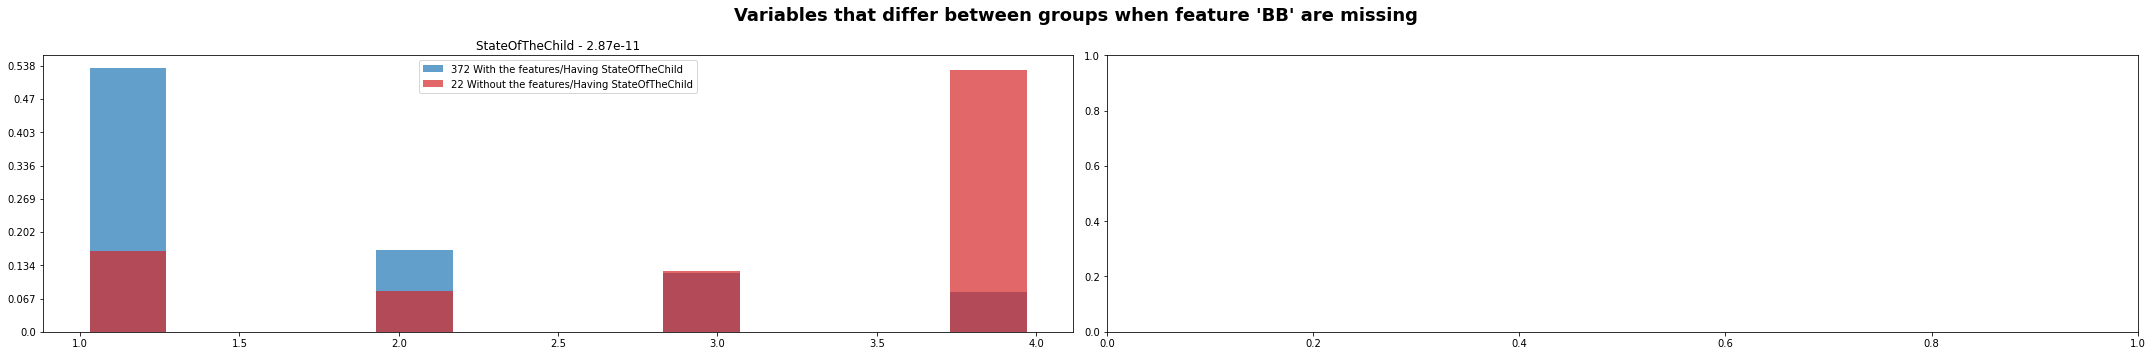

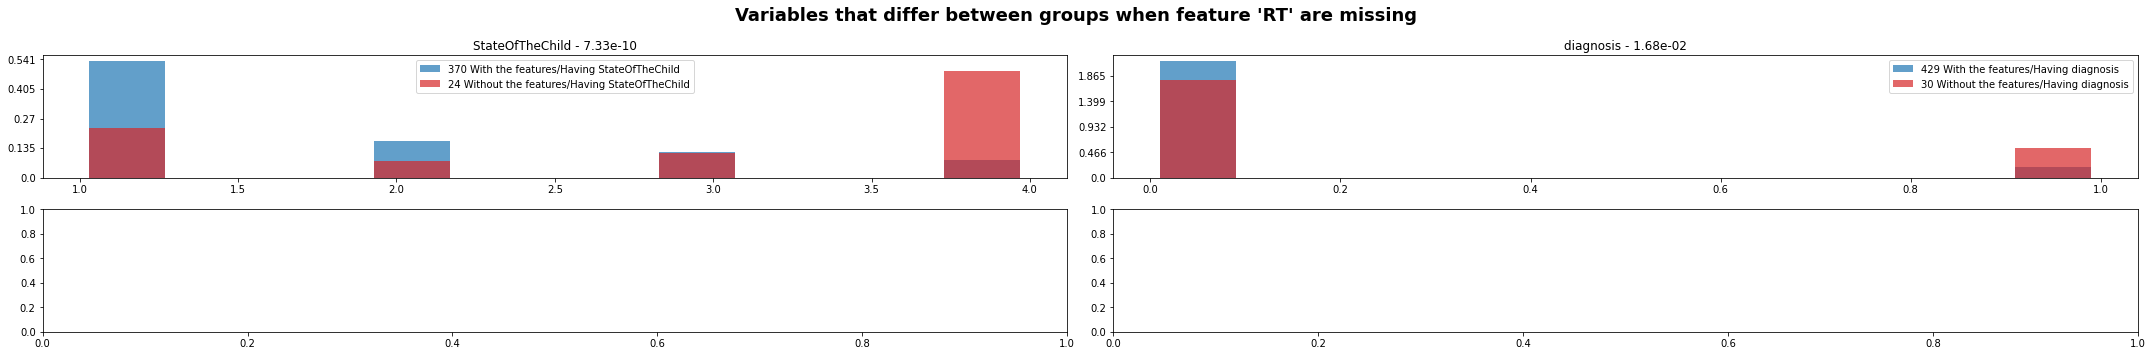

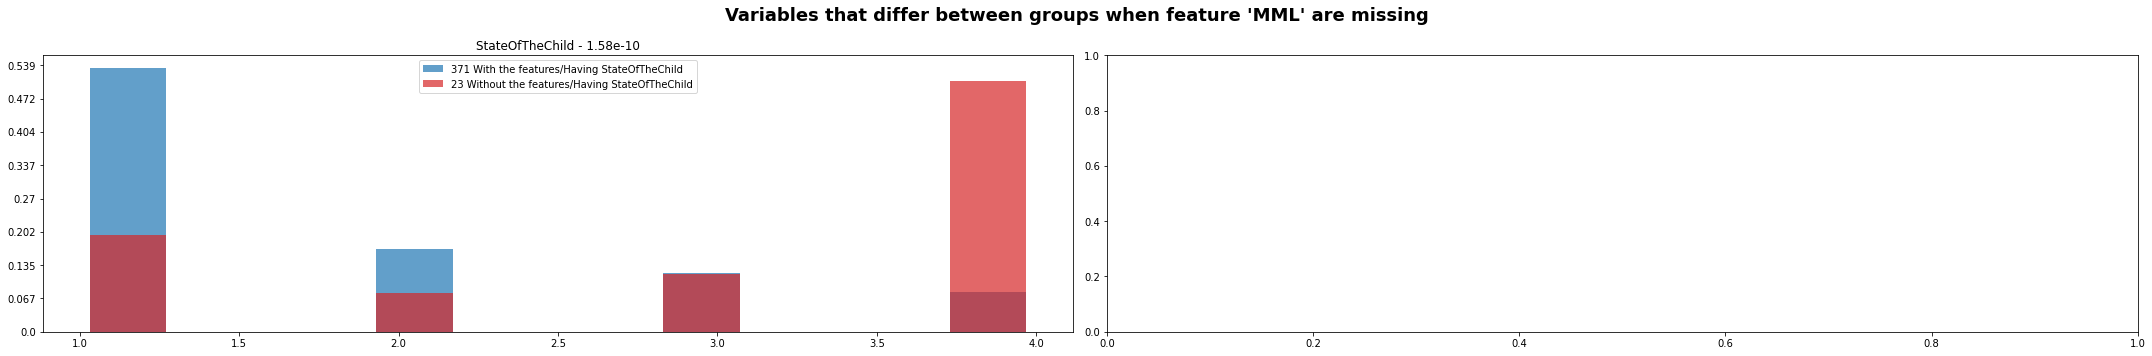

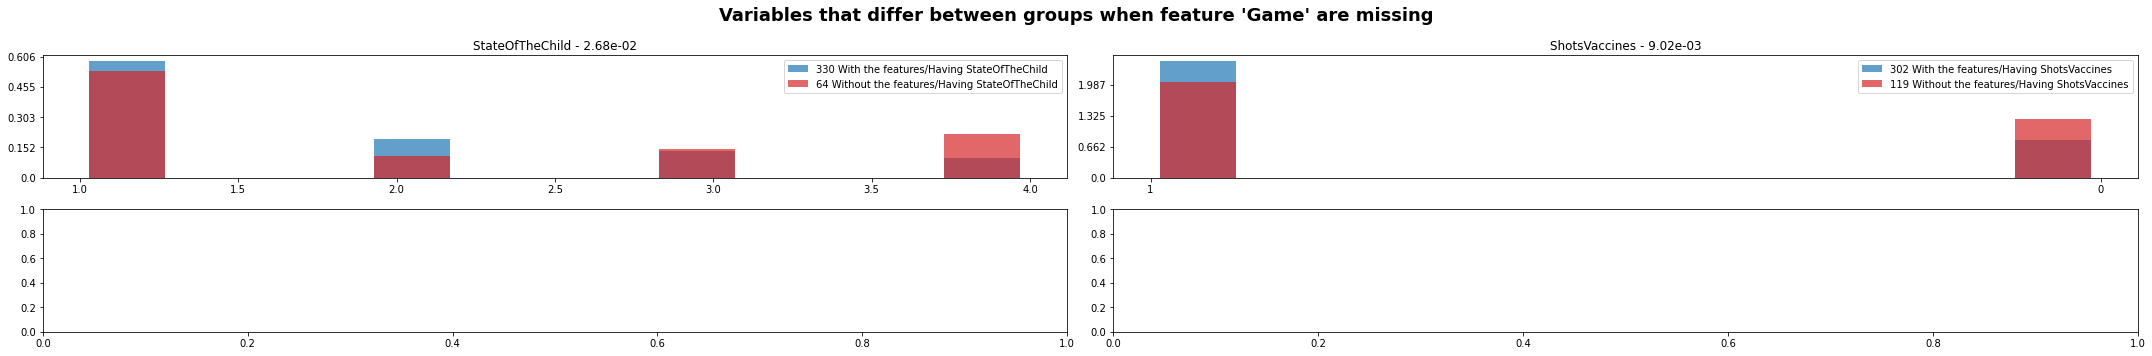

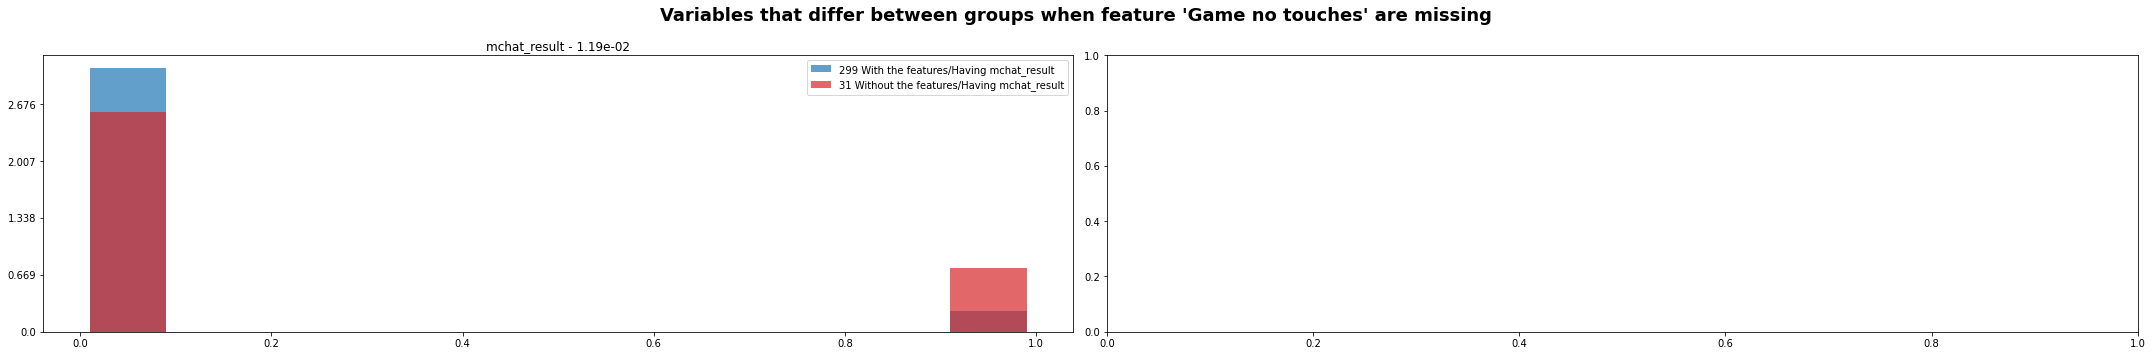

In [ ]:
mask  = (mcar_matrix<0.05).astype(int)

locations = [(index, column) for index in mask.index for column in mask.columns if mask.loc[index, column]==1]
for i, row in mask.transpose().iterrows():
    
    variables_with_interactions = list(row[row==1].index)
    n_plot = len(variables_with_interactions)
    if n_plot==0:
        continue

    fig, axes = plt.subplots(n_plot//2+1, 2, figsize=(30, 5));axes = axes.flatten()
    fig.suptitle("Variables that differ between groups when feature '{}' are missing".format(grouped_features_label[i]), weight='bold', fontsize=18)
    for j, var in enumerate(variables_with_interactions):
        feats = grouped_features[i]
        
        d = data.df.copy()

        if i in dict_check_1_0.keys():
            for idx_group_that_should_be_there in dict_check_1_0[i]:
                d = d[d['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
                
        
        having = d[d['Z_grouped_{}'.format(i)]==0][var].dropna()
        missing = d[d['Z_grouped_{}'.format(i)]==1][var].dropna()
        
        _, bins, _ = axes[j].hist(having,color='tab:blue',density=True, rwidth=.8, label='{} With the features/Having {}'.format(len(having), var), alpha=.7)
        axes[j].hist(missing, density=True, bins = bins, color='tab:red', rwidth=.8, label='{} Without the features/Having {}'.format(len(missing), var), alpha=.7)
        locs = axes[j].get_yticks(); axes[j].set_yticklabels(np.round(locs/len(having)*100,3))
        axes[j].set_title("{} - {:.2e}".format(var, mcar_matrix.loc[var, i]))
        axes[j].legend()
    plt.tight_layout();plt.show()

# Prediction of the missing variables

In [ ]:
for i, feats in grouped_features.items():
    data.df['Z_grouped_{}'.format(i)] = 0
    data.df.loc[data.df.drop(index=data.df.dropna(subset=feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1

touch_features =  ['number_of_touches','average_length','std_length','average_error','std_error','number_of_target','pop_rate',
 'average_touch_duration','std_touch_duration','average_delay_to_pop','std_delay_to_pop','average_force_applied','std_force_applied',
 'average_accuracy_variation','accuracy_consistency','average_touches_per_target', 'std_touches_per_target','average_time_spent','std_time_spent','exploratory_percentage']

In [ ]:
from interpret import show

for idx_grouped_missing_features, missing_feats in grouped_features.items():
    
    df =  pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
    #df =  pd.read_csv("/home01/sam/df_all.csv")

    df['study'] = df['path'].apply(lambda x: x.split('/')[-3] if x.split('/')[-3] in S2K_STUDIES else x.split('/')[-4])
    
    for i, feats in grouped_features.items():
        df['Z_grouped_{}'.format(i)] = 0
        df.loc[df.drop(index=df.dropna(subset=missing_feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1
    del i 
    
    features_name = [feat for feat in CVA_COLUMNS + CLINICAL_COLUMNS + VALIDITY_COLUMNS if (((idx_grouped_missing_features not in [8, 9, 10]) and (feat not in missing_feats)) or
                                                                                        ((idx_grouped_missing_features in [11, 12, 13, 14, 15, 16]) and (feat not in touch_features)) or
                                                                                        (feat not in ['completed']))]

    data = Dataset(df=df, 
                   missing_data_handling='encoding', 
                   imputation_method='without', 
                   sampling_method='without',
                       outcome_column='Z_grouped_{}'.format(idx_grouped_missing_features),
                    features_name = CVA_COLUMNS, 
                    scale_data=True,
                    use_missing_indicator_variables=False,
                   verbosity=4,
                   scenario='papers',
                   proportion_train=1)    
    
    exp = Experiments(data.dataset_name,
              dataset=data, 
            approach='ebm', 
            resolution=RESOLUTION, 
            bandwidth=BANDWIDTH, 
            previous_experiment=None,        
            verbosity=1, 
            debug=True, 
            save_experiment=False)
        
    
    print(grouped_features_label[idx_grouped_missing_features])

    if idx_grouped_missing_features in dict_check_1_0.keys():
        for idx_group_that_should_be_there in dict_check_1_0[idx_grouped_missing_features]:
            exp.dataset.df = exp.dataset.df[exp.dataset.df['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
    exp.fit_predict(num_cv=16)
    exp.plot()

    ebm_local = exp.model.explain_local(data.X_train, data.y_train)
    show(ebm_local)

['FB_postural_sway', 'FB_postural_sway_derivative']

 ['BB_gaze_percent_right', 'BB_gaze_silhouette_score', 'S_gaze_percent_right', 'S_gaze_silhouette_score', 'FP_gaze_speech_correlation', 'FP_gaze_silhouette_score', 'proportion_of_name_call_responses', 'average_response_to_name_delay', 'name_call_response_binary', 'FB_postural_sway', 'FB_postural_sway_derivative', 'DIGC_postural_sway', 'DIGC_postural_sway_derivative', 'DIGRRL_postural_sway', 'DIGRRL_postural_sway_derivative', 'ST_postural_sway', 'ST_postural_sway_derivative', 'MP_postural_sway', 'MP_postural_sway_derivative', 'PB_postural_sway', 'PB_postural_sway_derivative', 'BB_postural_sway', 'BB_postural_sway_derivative', 'RT_postural_sway', 'RT_postural_sway_derivative', 'MML_postural_sway', 'MML_postural_sway_derivative', 'PWB_postural_sway', 'PWB_postural_sway_derivative', 'FP_postural_sway', 'FP_postural_sway_derivative', 'number_of_touches', 'average_length', 'std_length', 'average_error', 'std_error', 'number_of_target', 'po

,id
diagnosis,
0.0,416
1.0,43


Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.
Predicting Z_grouped_0 based on 85 features
Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.
Floating Bubbles
Encoding 459 (train) and 0 (test) missing values with -5.
